<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 18 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                 --------------  -----  
 0   Timestamp                                                                                                              551 non-null    object 
 1   Your name                                                                                                              551 non-null    object 
 2   Your gender                                                                                                            551 non-null    object 
 3   Your age                                                                                                               551 non-null    object 
 4   Ho

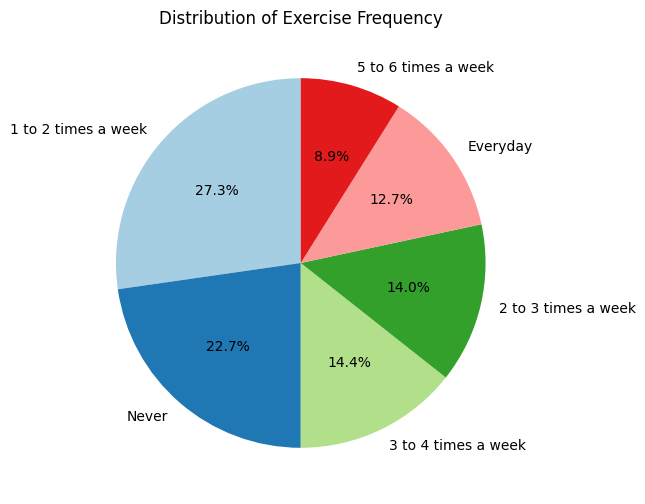

In [2]:
import pandas as pd

# 加载数据集
data = pd.read_csv('健康咨询客户数据集.csv')

# 查看表结构基本信息
print(data.info())

# 显示每一列的空缺值数量
print(data.isnull().sum())

# 删除含有缺失值的行
data_cleaned = data.dropna()

# 转换 'Your age' 列的数据类型为整数类型，并处理异常值
data_cleaned.loc[:, 'Your age'] = pd.to_numeric(data_cleaned['Your age'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['Your age'])
data_cleaned = data_cleaned[data_cleaned['Your age'] >= 0]
data_cleaned.loc[:, 'Your age'] = data_cleaned['Your age'].astype(int)

print(data_cleaned['Your age'].dtype)

# 检查和删除重复值
duplicates_removed = data_cleaned.duplicated().sum()
data_cleaned = data_cleaned.drop_duplicates()

print(f"Removed {duplicates_removed} duplicate rows")

from sklearn.preprocessing import LabelEncoder

# 归一化 'How do you describe your current level of fitness ?' 列
label_encoder = LabelEncoder()
data_cleaned['How do you describe your current level of fitness ?'] = label_encoder.fit_transform(data_cleaned['How do you describe your current level of fitness ?'])

print(data_cleaned['How do you describe your current level of fitness ?'].unique())

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 去掉列名中的空格
data.columns = data.columns.str.strip()
# 显示数据集的列名
print(data.columns)

# 删除包含缺失值的行
data_cleaned = data.dropna(subset=['How often do you exercise?'])

# 统计不同健身频率的分布情况
exercise_frequency_counts = data_cleaned['How often do you exercise?'].value_counts()

# 绘制饼图
plt.figure(figsize=(10, 6))
exercise_frequency_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Exercise Frequency')
plt.ylabel('')
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 填充缺失值
data_filled = data.apply(lambda x: x.fillna(x.mode()[0]))

# 划分数据（测试集占比20%）
train_data, test_data = train_test_split(data_filled, test_size=0.2, random_state=42)

# 保存处理后的数据
cleaned_file_path = '2.1.4_cleaned_data.csv'
data.to_csv(cleaned_file_path, index=False)
